Librerías

In [ ]:
import os
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd

Acceso a los CSV del Usuario



In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# Mount the drive folder. This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)


# Opens the project folder. IMPORTANT: Change to your route
%cd 'drive/My Drive/T_2_IA_22020'

Mounted at /content/drive
/content/drive/My Drive/T_2_IA_22020


Obtención de Matrices CSV to arrays, Carga del Set de datos y selección de los valores porcentuales de Train y Test

In [36]:
#Lectura del dataset cargado por el usuario

print("Seleccione el set de Datos:")
print("1. Airfoil")
print("2. Space Shuttle")
seleccion = float(input("Selección :"))

if seleccion==1:

    print("Se trabajara con el Set AirFoil:")
    data = pd.read_csv('/content/drive/My Drive/T_2_IA_22020/airfoil_self_noise.csv')
    X, y = data.values[:, :-1], data.values[:, -1]

    #El usuario selecciona los valores porcentuales de cantidad de datos para Entrenamiento y Pruebas
    #Ejemplo, sí el usuario selecciona 25% para Entramiento, se sabe que el 75% restante es para Pruebas
    #El usario ingresa el valor de la variable "valor"
    print("Ingrese el valor porcentual del set de Datos para entrenamiento:")
    valor = float(input("Porcentaje :"))
    a,=y.shape
    b,c=X.shape
    d=1
    tamaño=float(a)
    ventrenamiento=int(tamaño*valor*0.01)
    X_train=data.values[:ventrenamiento,:-1]
    X_test=data.values[ventrenamiento:,:-1]
    Y_train=data.values[:ventrenamiento,-1]
    Y_test=data.values[ventrenamiento:,-1]

    print("Se van a usar :",ventrenamiento,"Datos para train")
    print("Se van a usar :",a-ventrenamiento,"Datos para test")
    print("Cantidad de entradas:", c-1)
    print("Cantidad de salidas:", d)
    print("Vectores de trabajo:", d)
    print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

else:

    print("Se trabajara con el Set SpaceShuttle:")
    data = pd.read_csv('/content/drive/My Drive/T_2_IA_22020/o-ring-erosion-only.csv')
    X, y = data.values[:, :-1], data.values[:, -1]

    #El usuario selecciona los valores porcentuales de cantidad de datos para Entrenamiento y Pruebas
    #Ejemplo, sí el usuario selecciona 25% para Entramiento, se sabe que el 75% restante es para Pruebas
    #El usario ingresa el valor de la variable "valor"
    print("Ingrese el valor porcentual del set de Datos para entrenamiento:")
    valor = float(input("Porcentaje :"))

    a,=y.shape
    b,c=X.shape
    d=1
    tamaño=float(a)
    ventrenamiento=int(tamaño*valor*0.01)
    X_train=data.values[:ventrenamiento,:-1]
    X_test=data.values[ventrenamiento:,:-1]
    Y_train=data.values[:ventrenamiento,-1]
    Y_test=data.values[ventrenamiento:,-1]

    print("Se van a usar :",ventrenamiento,"Datos para train")
    print("Se van a usar :",a-ventrenamiento,"Datos para test")
    print("Cantidad de entradas:", (c-1))
    print("Cantidad de salidas:", d)
    print("Vectores de trabajo:")
    print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


Seleccione el set de Datos:
1. Airfoil
2. Space Shuttle
Selección :2
Se trabajara con el Set SpaceShuttle:
Ingrese el valor porcentual del set de Datos para entrenamiento:
Porcentaje :40
Se van a usar : 8 Datos para train
Se van a usar : 14 Datos para test
Cantidad de entradas: 3
Cantidad de salidas: 1
Vectores de trabajo:
(8, 4) (14, 4) (8,) (14,)


Ingresos del Usuario

In [37]:
print("Selecciones del usuario")
print("-Seleccionar el número de neuronas en la capa oculta.")
neuronas_capaoculta=input("Valor :")
print("-Seleccionar el número de iteraciones.")
iteraciones=input("Valor :")
print("-Seleccionar la función de activación")
print("1. Relu")
print("2. Tangente Hiperbólica")
print("3. Sigmoide")
f_activación=input("Selección :")
print("...Los datos se han guardado correctamente...")


Selecciones del usuario
-Seleccionar el número de neuronas en la capa oculta.
Valor :8
-Seleccionar el número de iteraciones.
Valor :200
-Seleccionar la función de activación
1. Relu
2. Tangente Hiperbólica
3. Sigmoide
Selección :3
...Los datos se han guardado correctamente...


Creación de la Neurona

In [ ]:
#La Neurona posee una salida que es la evaluación de la función de activación
#Para este caso se tienen 3 Funciones de activación, por lo tanto pueden haber 3 tipos de Neuronas
#net=sumadeproductos


def Neurona(f_activación, net, sesgo):

#tipo 1=Relu
        if (f_activación==1):
            if(net-sesgo>=0):
              return (net-sesgo)
            
            else:
              return 0        
#tipo 2=Tangente Hiperbólica
        if (f_activación==2):
          y= (2/(1+(math.e)^(-2(net-sesgo))))-1
          return y
        
#tipo 3=Sigmoide
        if (f_activación==3):
          y= (1/(1-(math.e)^(-(net-sesgo))))
          return y
    

Tasa de Aprendizaje

In [47]:
# Las tasas de aprendizaje , se deciden de 3 formas

print("Tasas de Aprendizaje")
print("-Seleccionar la opción :")
print("Tipo 1: Mismo valor para todos los pesos")
print("Tipo 2: Semi-aleatorio")
print("Tipo 3: Ingresado por el usuario")
tasadeaprendizaje=input("Selección :")
#tipo 1=mismo valor
if (tasadeaprendizaje==1):
  print("Mismo valor para todos los pesos")
  valorpesostodos=input("Valor :")
  print("...Los datos se han guardado correctamente...")
           
                    
#tipo 2=semi-aleatorio
if (tasadeaprendizaje==2):
  print("Semialeatorio...con un ruido de tipo gaussiano -máxima desviación 25 % del valor")
  valorsemialeatorio=input("Valor :")
  print("...Los datos se han guardado correctamente...")
          
        
#tipo 3=Ingresado por el usuario
if (tasadeaprendizaje==3):
  print("Ingrese el archivo de los pesos en la carpeta con el nombre: pesos.csv")
  data2 = pd.read_csv('/content/drive/My Drive/Tarea2_IA_22020/pesos.csv')
  print("...Los datos se han guardado correctamente...")



Tasas de Aprendizaje
-Seleccionar la opción :
Tipo 1: Mismo valor para todos los pesos
Tipo 2: Semi-aleatorio
Tipo 3: Ingresado por el usuario
Selección :1


Descenso de Gradiente

In [ ]:
#L2

Creación de la Red

In [ ]:
# Donde c = cantidad de entradas , d = cantidad de salidas
# c se obtiene de los datos del CSV al igual que d
#se va obtener una salida diferente por iteración, por lo tanto 

def Red(Neurona,Cantidad_Neuronas_Capa_Oculta,c,d,iteracion):

#Entradas

#Capa oculta

#Salida
  return

Proceso de creación del Modelo

In [ ]:
#En base a la desición del usuario sobre el número de neuronas en la capa oculta

#En base a la decisión del usuario sobre la tasa de aprendizaje

#En base a las iteraciones 

Guardar configuracion de pesos durante el entrenamiento

In [ ]:
#Escribir en un CSV los pesos del entrenamiento

Entrenamiento

In [ ]:
#Desarrollo Visual del entrenamiento

Curvas y Gráficas de Error y Entrenamiento

Text(0, 0.5, 'Mean Squared Error')

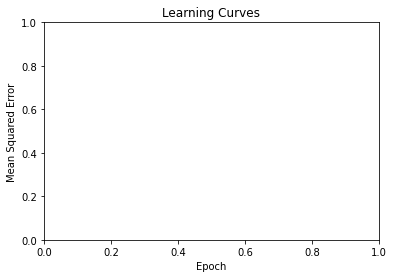

In [ ]:
#Curvas de error
pyplot.title('Curvas de entrenamiento')
pyplot.xlabel('Epocas')
pyplot.ylabel('Error')

Exportación de Archivos de Salida

In [ ]:
#Guardar dataframe como un nuevo csv
result_data.to_csv('ResultadodePrueba_1.csv')